### Overview of certain key metrics and state of different regions. 
- LPL and LEC are finishing games fastest out of the other leagues
- Herald actually has a winrate of 43% across all regions. Taking down Rift Herald super early can be a bait. It is a good objective but getting it pre 12 minutes is not high priority compared to towers due to the existence of tower plates. 
- Teams may be trying to over commit by getting the perfect payoff with RIFT + Plates but this is often not realistic. 
- Moreso, it could be an important time to capitalise on the amount of resources opponents are spending on securing rift.
- In other metrics, LCK still buys lots of wards in relation to LEC and LCS. Cs differences at 15 are more prominent in 'weaker' regions where skillcap is wider.

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

General overview of the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random
from itertools import count

In [3]:
summer_2019 = pd.read_csv("2019-summer-match-data-OraclesElixir-2019-06-17.csv")

In [4]:
summer_2019.head(10)

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,1,Blue,...,-668.0,4453.0,5258.0,-805.0,72.0,89.0,-17.0,127.0,152.0,-25.0
1,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,2,Blue,...,546.0,3876.0,3255.0,621.0,69.0,60.0,9.0,110.0,93.0,17.0
2,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,3,Blue,...,402.0,4973.0,4549.0,424.0,83.0,86.0,-3.0,139.0,145.0,-6.0
3,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,4,Blue,...,406.0,3275.0,3002.0,273.0,95.0,67.0,28.0,148.0,122.0,26.0
4,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,5,Blue,...,-15.0,2683.0,2557.0,126.0,15.0,14.0,1.0,24.0,23.0,1.0
5,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,6,Red,...,668.0,5258.0,4453.0,805.0,89.0,72.0,17.0,152.0,127.0,25.0
6,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,7,Red,...,-546.0,3255.0,3876.0,-621.0,60.0,69.0,-9.0,93.0,110.0,-17.0
7,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,8,Red,...,-402.0,4549.0,4973.0,-424.0,86.0,83.0,3.0,145.0,139.0,6.0
8,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,9,Red,...,-406.0,3002.0,3275.0,-273.0,67.0,95.0,-28.0,122.0,148.0,-26.0
9,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6499189815,1.0,1,9.1,10,Red,...,15.0,2557.0,2683.0,-126.0,14.0,15.0,-1.0,23.0,24.0,-1.0


Data comes from Oracle Elixir's 2019 Summer file, updated as of June 17. 

In [5]:
summer_2019.shape 
print('It consists of 2460 rows and 90 columns')
print(str(2460/10) +  " games across EU, NA, LMS, CBLOL and LCK are explored.\nSome data from LPL appears to be missing")


It consists of 2460 rows and 90 columns
246.0 games across EU, NA, LMS, CBLOL and LCK are explored.
Some data from LPL appears to be missing


# Key metrics in the global meta and differences between regions

- The low amount of games makes it easy for the data to biased by a few standout games 
- Coaches/analysts would be able to extract more my reviewing the game qualitatively 
- Therefore an overview of the meta was conducted to determine the competitive state of the game

In [6]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('fivethirtyeight')

### Game Length
- The regions considered to be worst such as LMS and CBLoL tend to have a shorter game time. 
- This may imply a playstyle difference or more importantly, suggest a slow game as a sign of weakness due to the inability to macro for closing the game. 

Text(0.5, 1.0, 'Average game length')

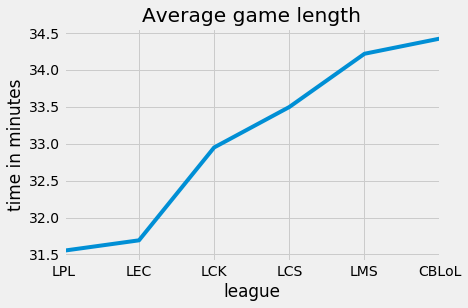

In [7]:
Leagues = summer_2019.groupby('league') # filter by league

Leagues['gamelength'].mean().sort_values().plot(kind = 'line')
plt.ylabel('time in minutes')
plt.title('Average game length')

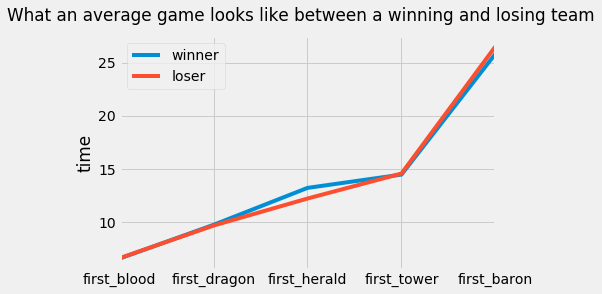

43.90243902439025% winrate when taking rift


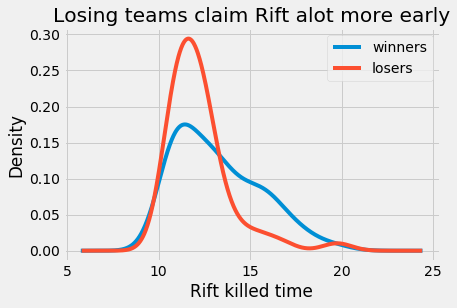

In [17]:
# set timeline for winners and timeline for losers
summer_2019['fbtime'] = pd.to_numeric(summer_2019['fbtime'], errors='NA')
summer_2019['fttime'] = pd.to_numeric(summer_2019['fttime'], errors='NA')
gametime = np.arange(0, 10, .5)
winners = summer_2019[summer_2019['result'] == 1]
losers = summer_2019[summer_2019['result'] == 0]

# first blood
winner_fb = winners[winners['fb'] == '1'] # 1 is numeric, need to change this later
winner_fb['fbtime'].mean() # 6.579

loser_fb = losers[losers['fb'] == '1'] 
loser_fb['fbtime'].mean() # 6.614

# first dragon 
winner_fd = winners[winners['fd'] == '1'] 
winner_fb['fdtime'].mean() # 9.75

losers_fd = losers[losers['fd'] == '1']
losers_fd['fdtime'].mean() # 9.679

# first tower
winner_first_tower = winners[winners['ft'] == 1]
winner_first_tower['fttime'].mean() # 14.47

losers_first_tower = losers[losers['ft'] == 1] 
losers_first_tower['fttime'].mean() # 14.57

# first herald
winner_herald = winners[winners['herald'] == 1]
winner_herald['heraldtime'].mean() # 13.22

losers_herald = losers[losers['herald'] == 1] 
losers_herald['heraldtime'].mean() # 12.22 First herald can be bait

# first baron
winner_baron = winners[winners['fbaron'] == 1]
winner_baron['fbarontime'].mean() # 25.82

losers_baron = losers[losers['fbaron'] == 1] 
losers_baron['fbarontime'].mean() # 26.51


objectives = ['first_blood', 'first_dragon', 'first_herald', 'first_tower', 'first_baron']
winner = [6.58, 9.75, 13.22, 14.47, 25.82]
loser = [6.614, 9.679, 12.22, 14.57, 26.51]

x_axis = objectives

# create a df then sort by objectives?
# Leagues['heraldtime'].mean().sort_values().plot(kind = 'line') 



d = {'objectives':objectives,'winner':winner,'loser':loser}
# Leagues['gamelength'].mean().sort_values().plot(kind = 'line')


df = pd.DataFrame(d, columns = ['objectives', 'winner', 'loser'])
df.head()



#i="id", j="year"
# objectives = df.groupby('objectives')
df.plot()
plt.xticks(np.arange(len(df.index)), df['objectives'])
plt.suptitle('What an average game looks like between a winning and losing team')
plt.ylabel('time')
plt.show()



winner_herald.shape
540/10
print(str(54/123*100) + "% winrate when taking rift")


winner_herald['heraldtime'].plot(kind = 'density', label='winners')
losers_herald['heraldtime'].plot(kind = 'density', label='losers')
plt.title('Losing teams claim Rift alot more early')
plt.xlabel('Rift killed time')
plt.legend()
plt.show()

# early_rift['result'].value_counts()

- The meta illustrates less of an emphasis on first tower and dragons leading to wins. 
- The introduction of plates may very be helping with this by providing an immediate gold boost that is not reflected in this dataset. 
- The biggest difference between the times of a winning and losing team appeared to be Herald, with teams completing it pre 12 minutes being at a disadvantage. Winning teams are not shy to leave Rift on the map for later. 

### How herald and Towers are prioritised in different regions

First tower time

Text(0, 0.5, 'time')

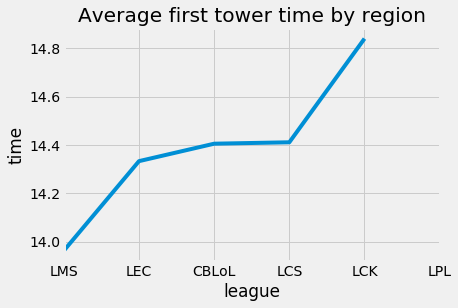

In [9]:
Leagues['fttime'].mean().sort_values().plot(kind = 'line')
plt.title('Average first tower time by region')
plt.ylabel('time')

First Herald time

Text(0, 0.5, 'time')

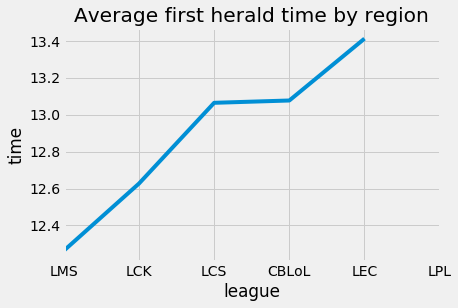

In [10]:
Leagues['heraldtime'].mean().sort_values().plot(kind = 'line') 
plt.title('Average first herald time by region')
plt.ylabel('time')

### Is there a correlation between herald time and first tower?
- Each point represents the time in which Herald and Tower was taken by the same team 
- The orange line represents the time in which Herald spawns until it disappears for Baron
- Points under the orange line are games in which the Herald is taken before the first tower 

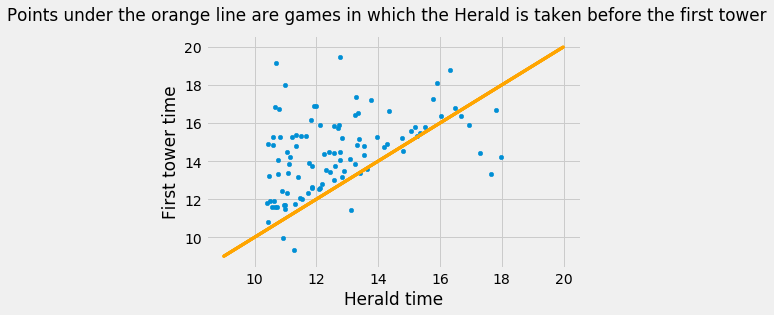

In [11]:
# filter for teams that attained herald and first tower 
herald = summer_2019[summer_2019['herald'] == 1]
ft_herald = herald[herald['ft'] == 1]


ft_herald.plot(kind = 'scatter', x = 'heraldtime', y = 'fttime')
plt.suptitle('Points under the orange line are games in which the Herald is taken before the first tower')
plt.xlabel('Herald time')
plt.ylabel('First tower time')


# creating a line between 10 and 20 that increments by 0.01
x_array = np.arange(9, 20, 0.01)
y_array = np.arange(9, 20, 0.01) 
plt.scatter(x_array, y_array, s=10, edgecolors='none', c='orange')



More often than not the first tower is taken before the Rift. 

### Winrates by tower objectives across all the games

In [12]:
winners = summer_2019[summer_2019['result'] == 1]

# divide by 10 for the amount of players
# divide by 123 for the amount of games
# times 100 to get a percentage
print("Winrate for first tower is " + str((winners['ft'].sum()/10)/123*100) + " percent") 
print("Winrate for first mid outer tower is " + str((winners['firstmidouter'].sum()/10)/123*100) + " percent")
print("Winrate for first to three towers is " + str((winners['firsttothreetowers'].sum()/10)/123*100) + " percent")

Winrate for first tower is 45.853658536585364 percent
Winrate for first mid outer tower is 52.19512195121951 percent
Winrate for first to three towers is 51.21951219512195 percent


### Average cs difference at different times for the winning side
- The differences in cs may not appear to be alot because this number is deflated by junglers and supports since it is taking the combined average CS difference of every player
- Skill difference or aggressive plays without information may be the reason for the large differences in cs in the smaller regions
- Stronger regions cannot rely on getting a lane advantage and must take different pursuits to gain a gold lead

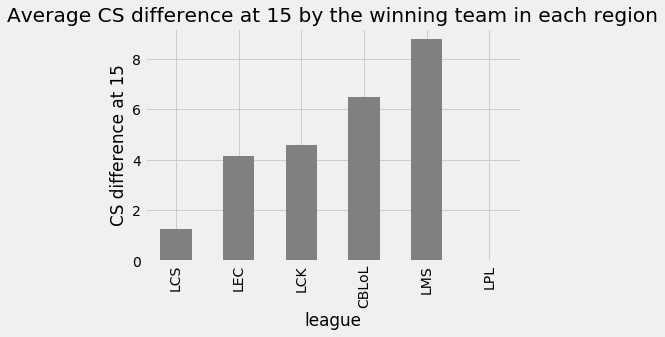

In [14]:
winners = summer_2019[summer_2019['result'] == 1] # filter by winners
winners_by_league = winners.groupby('league') # filter by league

plt.title('Average CS difference at 15 by the winning team in each region')
plt.ylabel('CS difference at 15')
plt.show(winners_by_league['csdat15'].mean().sort_values().plot(kind = 'bar', color = 'grey'))

### Vision wards purchased

Western regions buy less wards. There is still quite a big emphasis on wards within Korea

In [15]:
Leagues['visionwardbuys'].mean().sort_values()

league
LEC      14.508333
LCS      14.888889
LMS      15.533333
CBLoL    15.583333
LCK      16.440000
LPL            NaN
Name: visionwardbuys, dtype: float64